# Predict Sales competition
## Goal is to predict total sales for every product for the next month
I did not take the coursera course associated with this contest but I thought I'd give it a shot. 
Code that is commented out is likely something I ran in console to personally view but not worth visualizing 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import umap
import shap
import tensorflow as tf
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
df = pd.read_csv('.\\data\\sales_train.csv')
df_test = pd.read_csv('.\\data\\test.csv')
items = pd.read_csv('.//data/items.csv')
item_categories = pd.read_csv('.//data/item_categories.csv')
shops = pd.read_csv('.//data/shops.csv')

# Data Preprocessing & Exploration
The preprocessing for the test data will be done alongside the training data  
Begin with joining the lookup tables to the main table

In [3]:
#df.head()
#df.count()
#df.describe()
#item_categories.head()
#items.head()
#shops.head()

In [4]:
#joining the lookup tables by passing a list of them with their indexes set to their respective id columns
df = df.merge(items, left_on='item_id',right_on='item_id')            
df = df.merge(item_categories, left_on='item_category_id',right_on='item_category_id')
df = df.merge(shops, left_on='shop_id',right_on='shop_id')
#df.isnull().sum()

In [5]:
df_test = df_test.merge(items, left_on='item_id',right_on='item_id')            
df_test = df_test.merge(item_categories, left_on='item_category_id',right_on='item_category_id')
df_test = df_test.merge(shops, left_on='shop_id',right_on='shop_id')
#df_test.isnull().sum()

Won't be able to easily interpret the names for items, shops, or item categories because they are in Russian but they will be useful for visualizing the data
  
I originally tried to use the join function to match what I would have done in SQL but it would not do one to many matches and left many null values. Doing the merges one table at a time is a little tedious and repetitive so I will see if there is a better way to do this.

### Date parts column engineering
we need to get the month, year, and day separately from the date  
also what is the date_block_num column?

In [6]:
type(df['date'][0])
#date is by string, so I can split by the period for each date part

str

In [7]:
#create columns for each date part
df['day'] = df['date'].apply(lambda x: x.split('.')[0])
df['month'] = df['date'].apply(lambda x: x.split('.')[1])
df['year'] = df['date'].apply(lambda x: x.split('.')[2])

In [8]:
#Want to see the total sales by month for every product, so lets start with a single product
df['item_id'].value_counts().head()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
Name: item_id, dtype: int64

In [9]:
#The top product will do for our sample
df_s = df[df['item_id'] == 20949]

In [23]:
df_s.month = df_s.month.astype(int)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='month', ylabel='item_price'>

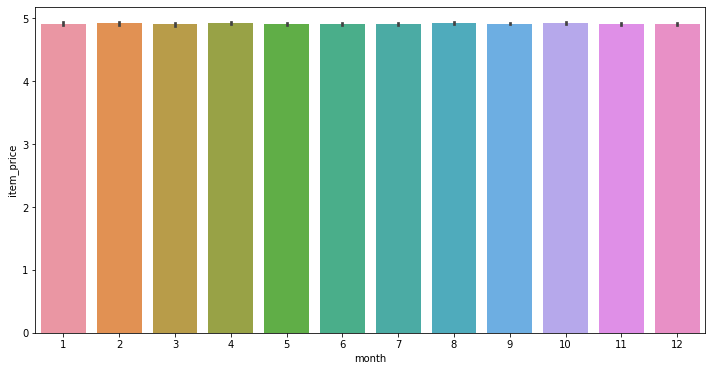

In [27]:
#check the distribution of prices for a given item
month_order = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='item_price',data=df_s,order=month_order)